## Read Data

In [1]:
import os
from reactivation import AssemblyReact
from import_data import (
     load_cell_metrics,
     load_epochs, 
     load_SleepState_states,
     load_spikes,
     event_triggered_average_fast
     )
from si import get_significant_events, similarity_index
import nelpy as nel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:


def read_all(project_path):
    
    mice_names= os.listdir(project_path) 
    data = {}
    for mice_name in mice_names:
        mice_name_sum = mice_name.split('_')[0]+"_"+ mice_name.split('_')[2]
        
        data[mice_name_sum] = AssemblyReact(
            project_path=project_path,
            mice_name=mice_name,
            brainRegion="CA2-CA3",
            putativeCellType="Pyramidal Cell",
            z_mat_dt=0.025,
        )
        
        data[mice_name_sum].load_data()
    
    return data
    
D = read_all('D:/37/D')

# Object

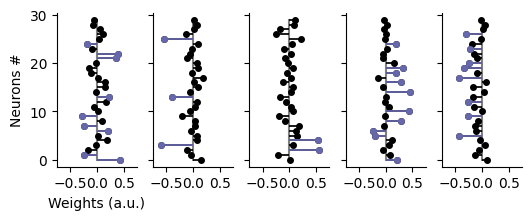

In [18]:
D['FL3_sess1'].get_weights(epoch= D['FL3_sess1'].epochs[1])
D['FL3_sess1'].plot()
plt.show()

All assemblies are CA2

----

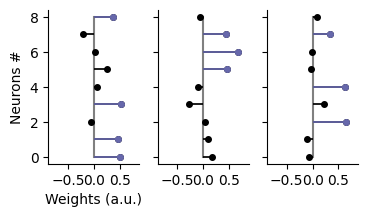

In [20]:
D['FL3_sess3'].get_weights(epoch= D['FL3_sess3'].epochs[1])
D['FL3_sess3'].plot()
plt.show()

All assemblies are CA2

----

In [26]:
D['FL3_sess5'].get_weights(epoch= D['FL3_sess5'].epochs[1])

C:\Users\Nafir\Documents\team37\new pablo\assembly.py:213: UserWarning: no assembly detected


----

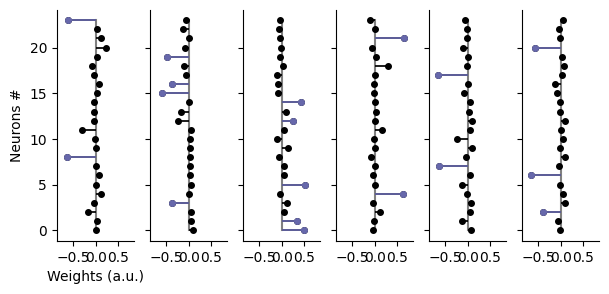

In [28]:
D['FL4_sess1'].get_weights(epoch= D['FL4_sess1'].epochs[1])
D['FL4_sess1'].plot()
plt.show()

All assemblies are CA2

----

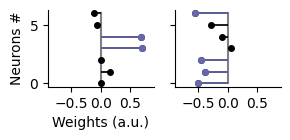

In [32]:
D['FL4_sess3'].get_weights(epoch= D['FL4_sess3'].epochs[1])
D['FL4_sess3'].plot()
plt.show()

All assemblies are CA2

---

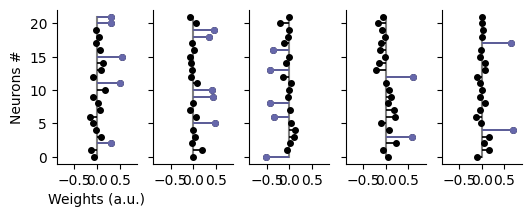

In [30]:


D['FL4_sess5'].get_weights(epoch= D['FL4_sess5'].epochs[1])
D['FL4_sess5'].plot()
plt.show()

All assemblies are CA2

----

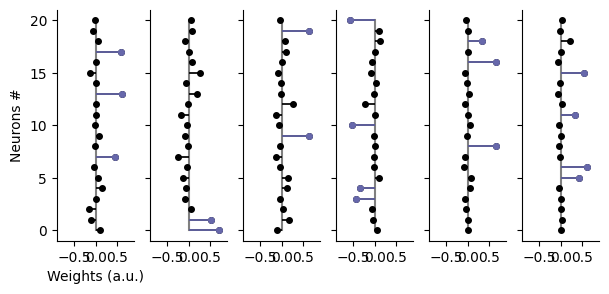

In [312]:
D['FL4_sess7'].get_weights(epoch= D['FL4_sess7'].epochs[1])
D['FL4_sess7'].plot()
plt.show()

All assemblies are CA2

----

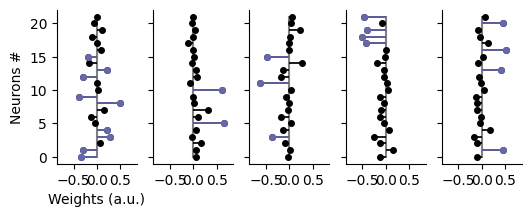

In [34]:
D['FL5_sess1'].get_weights(epoch= D['FL5_sess1'].epochs[1])
D['FL5_sess1'].plot()
plt.show()

CA2 = 1

CA2-CA3 = 0 ,2 ,4

CA3 = 3

-----

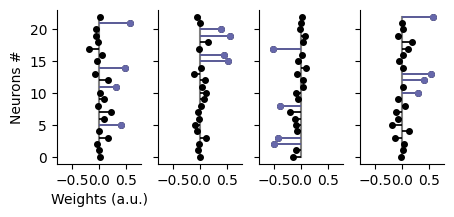

In [36]:
D['FL5_sess3'].get_weights(epoch= D['FL5_sess3'].epochs[1])
D['FL5_sess3'].plot()
plt.show()

CA2 = 

CA2-CA3 = 0 ,2 

CA3 = 1, 3


----

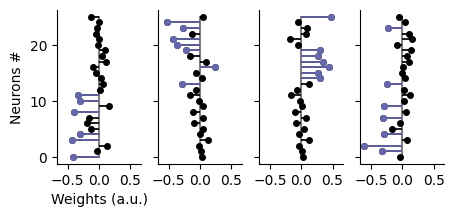

In [38]:
D['FL5_sess5'].get_weights(epoch= D['FL5_sess5'].epochs[1])
D['FL5_sess5'].plot()
plt.show()

CA2 = 0

CA2-CA3 = 3

CA3 = 1, 2

----

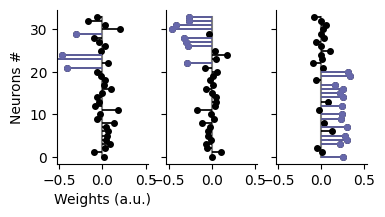

In [317]:
D['FL5_sess7'].get_weights(epoch= D['FL5_sess7'].epochs[1])
D['FL5_sess7'].plot()
plt.show()

CA2 = 2

CA2-CA3 = 

CA3 = 0,1


----

# Social

## Novel-Familiar

### FL3

#### S2

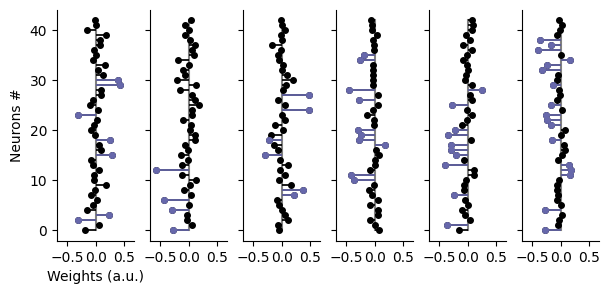

In [9]:
D['FL3_sess2'].get_weights(epoch= D['FL3_sess2'].epochs[1])
D['FL3_sess2'].plot()
plt.show()
pattern_novel = D['FL3_sess2'].patterns


All assemblies are CA2

------

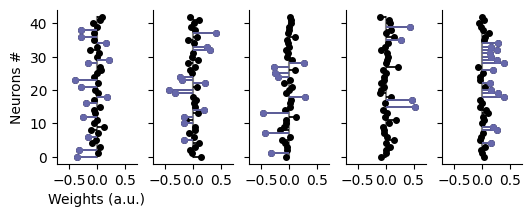

In [11]:
D['FL3_sess2'].get_weights(epoch= D['FL3_sess2'].epochs[3])
D['FL3_sess2'].plot()
plt.show()
pattern_familiar = D['FL3_sess2'].patterns


All assemblies are CA2

----

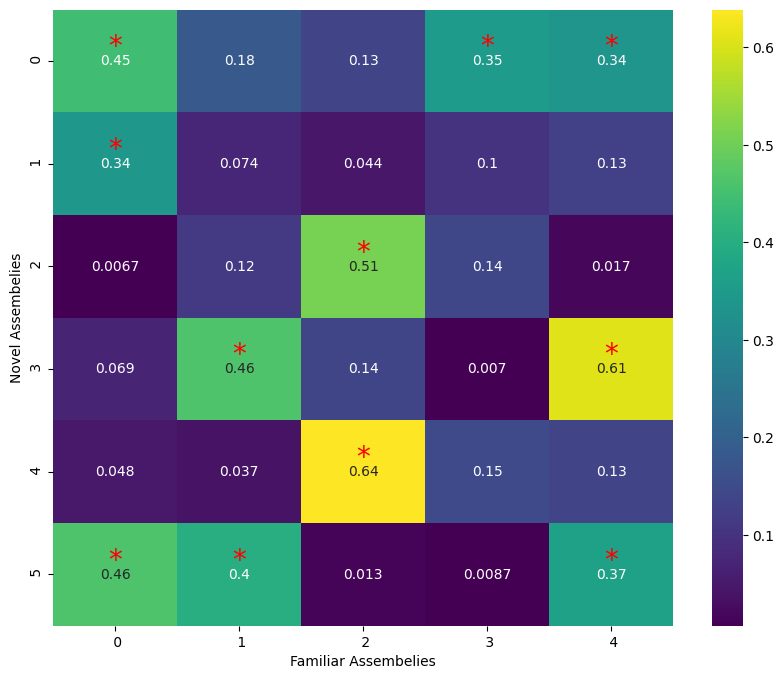

In [13]:

compare_patterns= np.concatenate((pattern_novel, pattern_familiar))

SI,pairs ,pval =similarity_index(compare_patterns)

novel_assembly_index = list(range(len(pattern_novel)))
familiar_assembly_index = list(range(len(pattern_novel),len(pattern_novel)+len(pattern_familiar)))

heatmap_matrix_SI = np.zeros((len(novel_assembly_index), len(familiar_assembly_index)))

significant_matrix = np.zeros_like(heatmap_matrix_SI, dtype=bool)

for i, a in enumerate(novel_assembly_index):
    for j, b in enumerate(familiar_assembly_index):
        index = np.where((pairs[:, 0] == a) & (pairs[:, 1] == b))[0]
        if len(index) > 0:
            heatmap_matrix_SI[i, j] = SI[index[0]]
            significant_matrix[i, j] = pval[index[0]] < 0.05
        else:
            index = np.where((pairs[:, 0] == b) & (pairs[:, 1] == a))[0]
            if len(index) > 0:
                heatmap_matrix_SI[i, j] = SI[index[0]]
                significant_matrix[i, j] = pval[index[0]] < 0.05

plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_matrix_SI, annot=True, cmap='viridis', xticklabels=[f' {b}' for b in list(range(len(pattern_familiar)))], yticklabels=[f' {a}' for a in list(range(len(pattern_novel)))])

for i in range(len(novel_assembly_index)):
    for j in range(len(familiar_assembly_index)):
        if significant_matrix[i, j]:
            ax.text(j + 0.5, i + 0.5, '*',size = 20, color='red', ha='center', va='bottom')


plt.xlabel('Familiar Assembelies')
plt.ylabel('Novel Assembelies')
plt.show()

#### S4

In [32]:
D['FL3_sess4'].get_weights(epoch= D['FL3_sess4'].epochs[1])
#D['FL3_sess4'].plot()
#plt.show()
pattern_novel = D['FL3_sess4'].patterns


In [36]:
D['FL3_sess4'].get_weights(epoch= D['FL3_sess4'].epochs[3])
#D['FL3_sess4'].plot()
#plt.show()
pattern_familiar = D['FL3_sess4'].patterns


Familiar has just one: CA2
Novel has just one: CA2

----

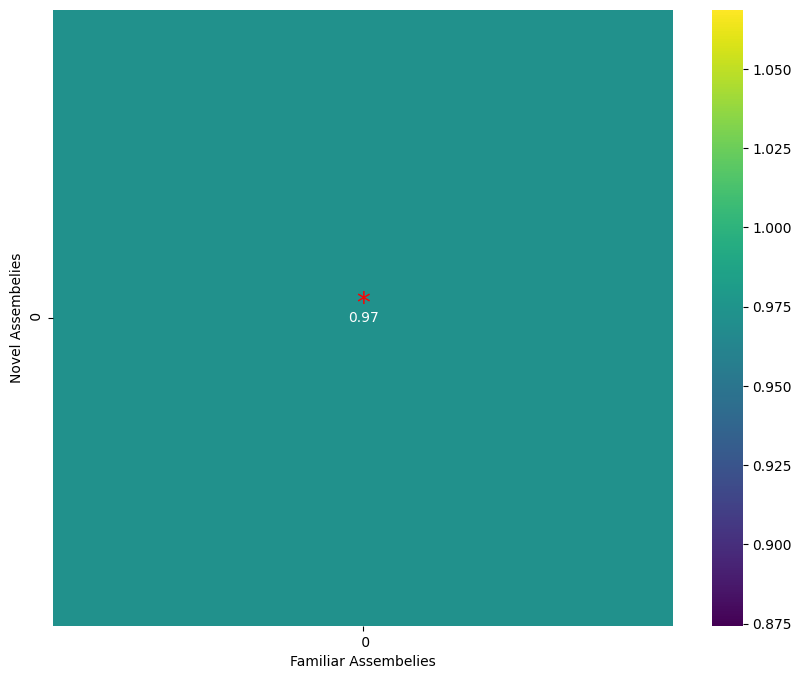

In [38]:

compare_patterns= np.concatenate((pattern_novel, pattern_familiar))

SI,pairs ,pval =similarity_index(compare_patterns)

novel_assembly_index = list(range(len(pattern_novel)))
familiar_assembly_index = list(range(len(pattern_novel),len(pattern_novel)+len(pattern_familiar)))

heatmap_matrix_SI = np.zeros((len(novel_assembly_index), len(familiar_assembly_index)))

significant_matrix = np.zeros_like(heatmap_matrix_SI, dtype=bool)

for i, a in enumerate(novel_assembly_index):
    for j, b in enumerate(familiar_assembly_index):
        index = np.where((pairs[:, 0] == a) & (pairs[:, 1] == b))[0]
        if len(index) > 0:
            heatmap_matrix_SI[i, j] = SI[index[0]]
            significant_matrix[i, j] = pval[index[0]] < 0.05
        else:
            index = np.where((pairs[:, 0] == b) & (pairs[:, 1] == a))[0]
            if len(index) > 0:
                heatmap_matrix_SI[i, j] = SI[index[0]]
                significant_matrix[i, j] = pval[index[0]] < 0.05

plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_matrix_SI, annot=True, cmap='viridis', xticklabels=[f' {b}' for b in list(range(len(pattern_familiar)))], yticklabels=[f' {a}' for a in list(range(len(pattern_novel)))])

for i in range(len(novel_assembly_index)):
    for j in range(len(familiar_assembly_index)):
        if significant_matrix[i, j]:
            ax.text(j + 0.5, i + 0.5, '*',size = 20, color='red', ha='center', va='bottom')


plt.xlabel('Familiar Assembelies')
plt.ylabel('Novel Assembelies')
plt.show()

### FL4

#### S2

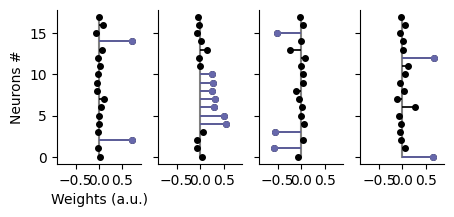

In [54]:
D['FL4_sess2'].get_weights(epoch= D['FL4_sess2'].epochs[1])
D['FL4_sess2'].plot()
plt.show()
pattern_novel = D['FL4_sess2'].patterns


All assemblies are CA2

----

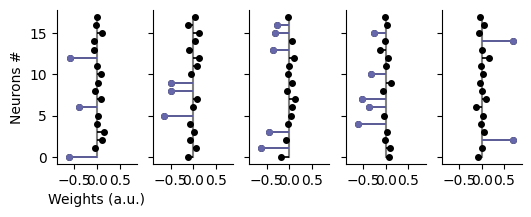

In [56]:
D['FL4_sess2'].get_weights(epoch= D['FL4_sess2'].epochs[3])
D['FL4_sess2'].plot()
plt.show()
pattern_familiar = D['FL4_sess2'].patterns


All assemblies are CA2

----

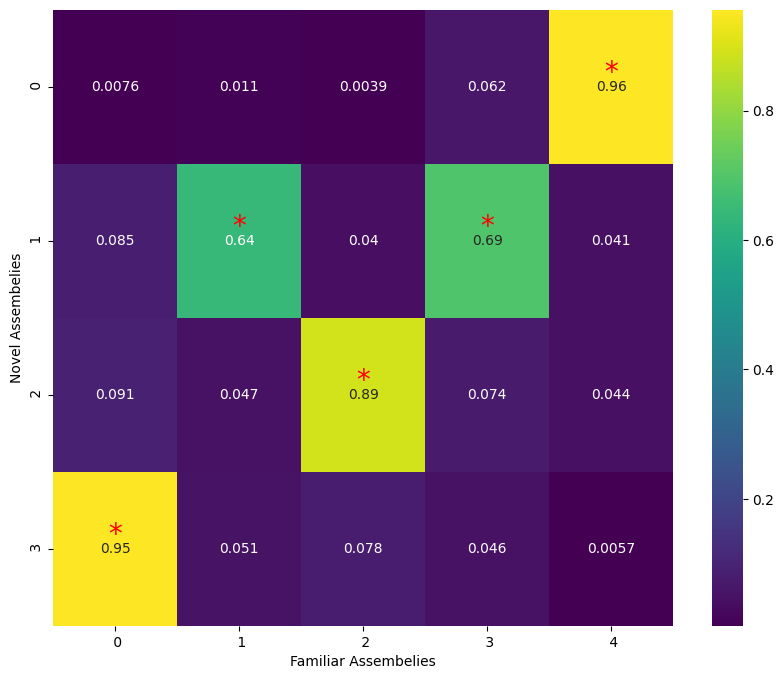

In [58]:

compare_patterns= np.concatenate((pattern_novel, pattern_familiar))

SI,pairs ,pval =similarity_index(compare_patterns)

novel_assembly_index = list(range(len(pattern_novel)))
familiar_assembly_index = list(range(len(pattern_novel),len(pattern_novel)+len(pattern_familiar)))

heatmap_matrix_SI = np.zeros((len(novel_assembly_index), len(familiar_assembly_index)))

significant_matrix = np.zeros_like(heatmap_matrix_SI, dtype=bool)

for i, a in enumerate(novel_assembly_index):
    for j, b in enumerate(familiar_assembly_index):
        index = np.where((pairs[:, 0] == a) & (pairs[:, 1] == b))[0]
        if len(index) > 0:
            heatmap_matrix_SI[i, j] = SI[index[0]]
            significant_matrix[i, j] = pval[index[0]] < 0.05
        else:
            index = np.where((pairs[:, 0] == b) & (pairs[:, 1] == a))[0]
            if len(index) > 0:
                heatmap_matrix_SI[i, j] = SI[index[0]]
                significant_matrix[i, j] = pval[index[0]] < 0.05

plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_matrix_SI, annot=True, cmap='viridis', xticklabels=[f' {b}' for b in list(range(len(pattern_familiar)))], yticklabels=[f' {a}' for a in list(range(len(pattern_novel)))])

for i in range(len(novel_assembly_index)):
    for j in range(len(familiar_assembly_index)):
        if significant_matrix[i, j]:
            ax.text(j + 0.5, i + 0.5, '*',size = 20, color='red', ha='center', va='bottom')


plt.xlabel('Familiar Assembelies')
plt.ylabel('Novel Assembelies')
plt.show()

#### S4

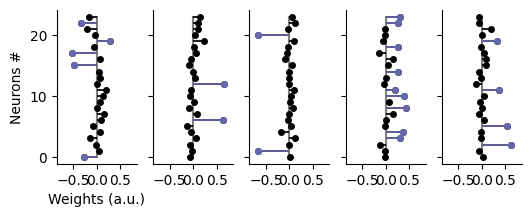

In [64]:
D['FL4_sess4'].get_weights(epoch= D['FL4_sess4'].epochs[1])
D['FL4_sess4'].plot()
plt.show()
pattern_novel = D['FL4_sess4'].patterns


CA2 = 1,2,4

CA3 = 

CA2-CA3 = 0,3

---

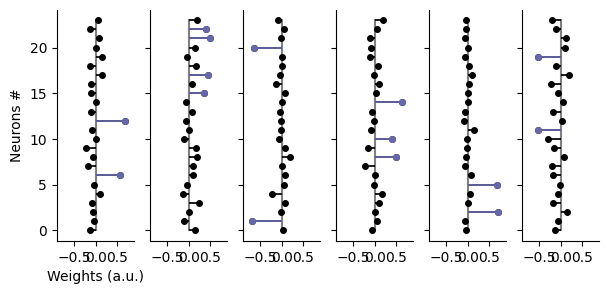

In [66]:
D['FL4_sess4'].get_weights(epoch= D['FL4_sess4'].epochs[3])
D['FL4_sess4'].plot()
plt.show()
pattern_familiar = D['FL4_sess4'].patterns


CA2 = 0,2,3,4,5

CA3 =

CA2-CA3 =1

---

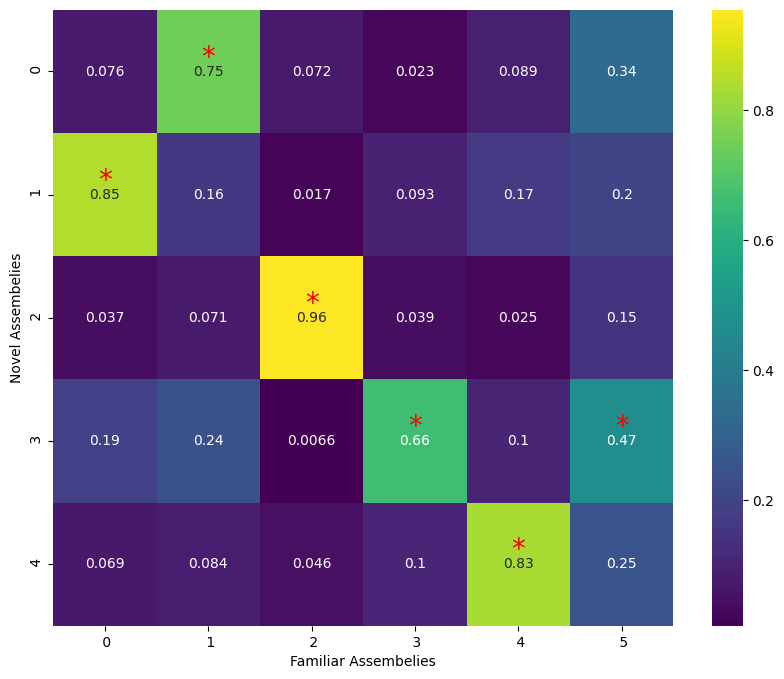

In [68]:

compare_patterns= np.concatenate((pattern_novel, pattern_familiar))

SI,pairs ,pval =similarity_index(compare_patterns)

novel_assembly_index = list(range(len(pattern_novel)))
familiar_assembly_index = list(range(len(pattern_novel),len(pattern_novel)+len(pattern_familiar)))

heatmap_matrix_SI = np.zeros((len(novel_assembly_index), len(familiar_assembly_index)))

significant_matrix = np.zeros_like(heatmap_matrix_SI, dtype=bool)

for i, a in enumerate(novel_assembly_index):
    for j, b in enumerate(familiar_assembly_index):
        index = np.where((pairs[:, 0] == a) & (pairs[:, 1] == b))[0]
        if len(index) > 0:
            heatmap_matrix_SI[i, j] = SI[index[0]]
            significant_matrix[i, j] = pval[index[0]] < 0.05
        else:
            index = np.where((pairs[:, 0] == b) & (pairs[:, 1] == a))[0]
            if len(index) > 0:
                heatmap_matrix_SI[i, j] = SI[index[0]]
                significant_matrix[i, j] = pval[index[0]] < 0.05

plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_matrix_SI, annot=True, cmap='viridis', xticklabels=[f' {b}' for b in list(range(len(pattern_familiar)))], yticklabels=[f' {a}' for a in list(range(len(pattern_novel)))])

for i in range(len(novel_assembly_index)):
    for j in range(len(familiar_assembly_index)):
        if significant_matrix[i, j]:
            ax.text(j + 0.5, i + 0.5, '*',size = 20, color='red', ha='center', va='bottom')


plt.xlabel('Familiar Assembelies')
plt.ylabel('Novel Assembelies')
plt.show()

### FL5

#### S2

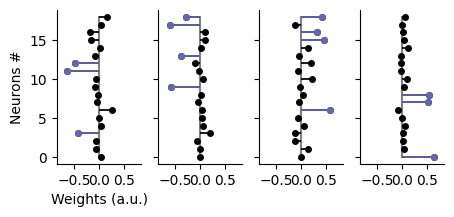

In [89]:
D['FL5_sess2'].get_weights(epoch= D['FL5_sess2'].epochs[1])
D['FL5_sess2'].plot()
plt.show()
pattern_novel = D['FL5_sess2'].patterns


CA2 = 3

CA3 = 1

CA2-CA3 = 0, 2

----

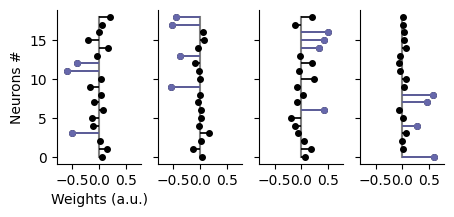

In [126]:
D['FL5_sess2'].get_weights(epoch= D['FL5_sess2'].epochs[3])
D['FL5_sess2'].plot()
plt.show()
pattern_familiar = D['FL5_sess2'].patterns


CA2 = 3

CA3 = 1

CA2-CA3 = 0, 2 

-----

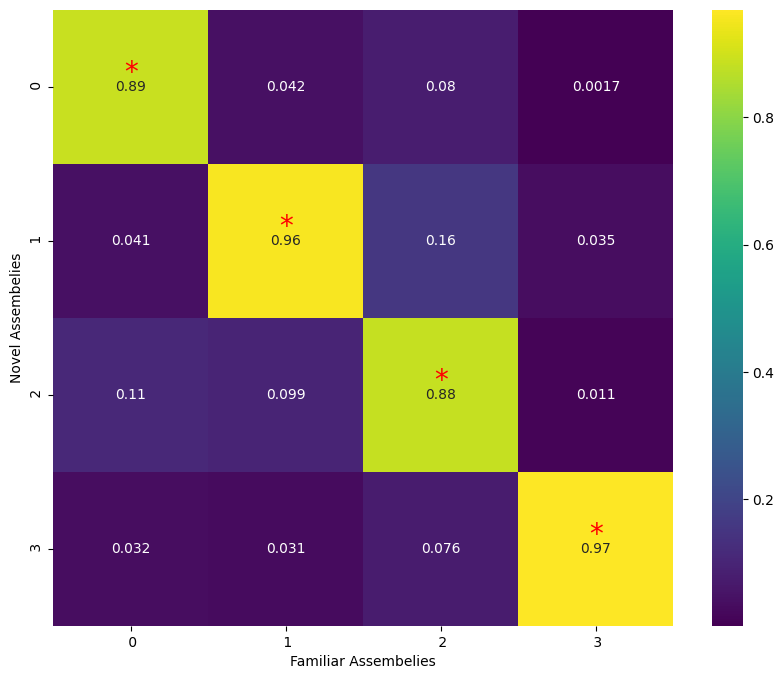

In [85]:

compare_patterns= np.concatenate((pattern_novel, pattern_familiar))

SI,pairs ,pval =similarity_index(compare_patterns)

novel_assembly_index = list(range(len(pattern_novel)))
familiar_assembly_index = list(range(len(pattern_novel),len(pattern_novel)+len(pattern_familiar)))

heatmap_matrix_SI = np.zeros((len(novel_assembly_index), len(familiar_assembly_index)))

significant_matrix = np.zeros_like(heatmap_matrix_SI, dtype=bool)

for i, a in enumerate(novel_assembly_index):
    for j, b in enumerate(familiar_assembly_index):
        index = np.where((pairs[:, 0] == a) & (pairs[:, 1] == b))[0]
        if len(index) > 0:
            heatmap_matrix_SI[i, j] = SI[index[0]]
            significant_matrix[i, j] = pval[index[0]] < 0.05
        else:
            index = np.where((pairs[:, 0] == b) & (pairs[:, 1] == a))[0]
            if len(index) > 0:
                heatmap_matrix_SI[i, j] = SI[index[0]]
                significant_matrix[i, j] = pval[index[0]] < 0.05

plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_matrix_SI, annot=True, cmap='viridis', xticklabels=[f' {b}' for b in list(range(len(pattern_familiar)))], yticklabels=[f' {a}' for a in list(range(len(pattern_novel)))])

for i in range(len(novel_assembly_index)):
    for j in range(len(familiar_assembly_index)):
        if significant_matrix[i, j]:
            ax.text(j + 0.5, i + 0.5, '*',size = 20, color='red', ha='center', va='bottom')


plt.xlabel('Familiar Assembelies')
plt.ylabel('Novel Assembelies')
plt.show()

#### S4

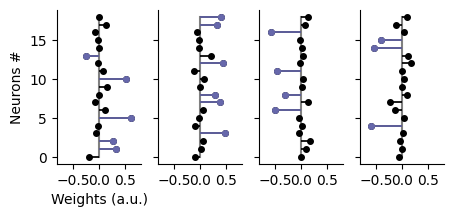

In [151]:
D['FL5_sess4'].get_weights(epoch= D['FL5_sess4'].epochs[1])
D['FL5_sess4'].plot()
plt.show()
pattern_novel = D['FL5_sess4'].patterns


CA2 = 

CA3 = 1,2,3

CA2-CA3 = 0

-----

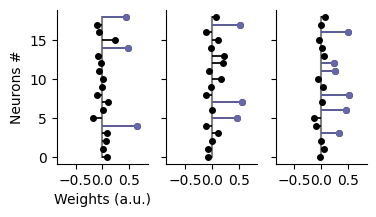

In [158]:
D['FL5_sess4'].get_weights(epoch= D['FL5_sess4'].epochs[3])
D['FL5_sess4'].plot()
plt.show()
pattern_familiar = D['FL5_sess4'].patterns


All assemblies are CA3

-----

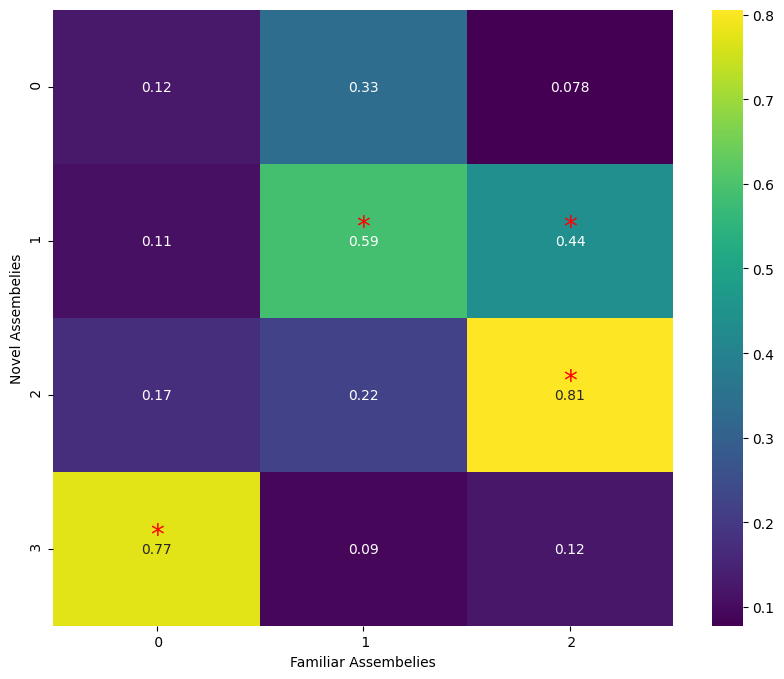

In [141]:

compare_patterns= np.concatenate((pattern_novel, pattern_familiar))

SI,pairs ,pval =similarity_index(compare_patterns)

novel_assembly_index = list(range(len(pattern_novel)))
familiar_assembly_index = list(range(len(pattern_novel),len(pattern_novel)+len(pattern_familiar)))

heatmap_matrix_SI = np.zeros((len(novel_assembly_index), len(familiar_assembly_index)))

significant_matrix = np.zeros_like(heatmap_matrix_SI, dtype=bool)

for i, a in enumerate(novel_assembly_index):
    for j, b in enumerate(familiar_assembly_index):
        index = np.where((pairs[:, 0] == a) & (pairs[:, 1] == b))[0]
        if len(index) > 0:
            heatmap_matrix_SI[i, j] = SI[index[0]]
            significant_matrix[i, j] = pval[index[0]] < 0.05
        else:
            index = np.where((pairs[:, 0] == b) & (pairs[:, 1] == a))[0]
            if len(index) > 0:
                heatmap_matrix_SI[i, j] = SI[index[0]]
                significant_matrix[i, j] = pval[index[0]] < 0.05

plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_matrix_SI, annot=True, cmap='viridis', xticklabels=[f' {b}' for b in list(range(len(pattern_familiar)))], yticklabels=[f' {a}' for a in list(range(len(pattern_novel)))])

for i in range(len(novel_assembly_index)):
    for j in range(len(familiar_assembly_index)):
        if significant_matrix[i, j]:
            ax.text(j + 0.5, i + 0.5, '*',size = 20, color='red', ha='center', va='bottom')


plt.xlabel('Familiar Assembelies')
plt.ylabel('Novel Assembelies')
plt.show()

## Novel-Novel

### FL3

#### S6

In [187]:
D['FL3_sess6'].get_weights(epoch= D['FL3_sess6'].epochs[1])
#D['FL3_sess6'].plot()
#plt.show()
pattern_novel1 = D['FL3_sess6'].patterns


Just one assembly : CA2

-----

In [192]:
D['FL3_sess6'].get_weights(epoch= D['FL3_sess6'].epochs[3])
#D['FL3_sess6'].plot()
#plt.show()
pattern_novel2 = D['FL3_sess6'].patterns


Just one assembly : CA2

-----

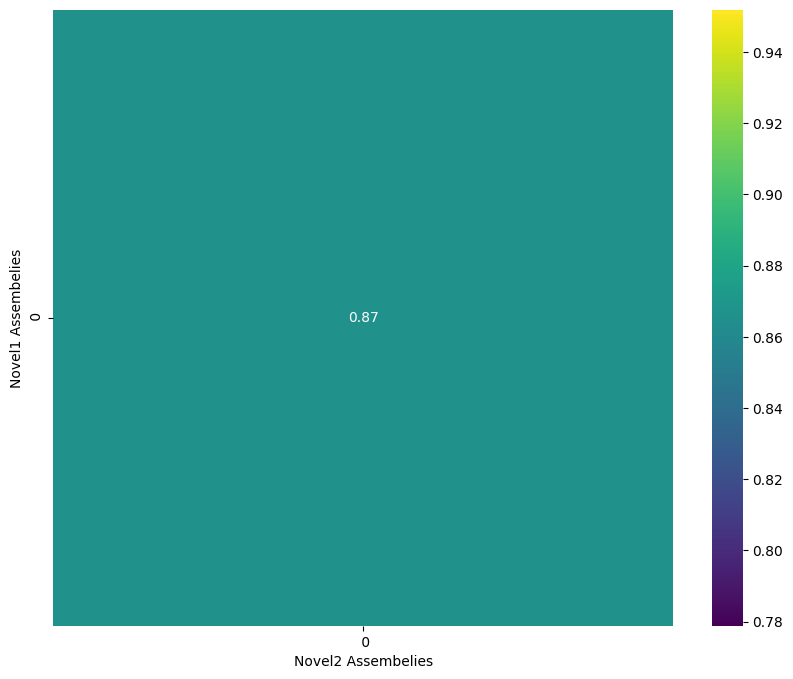

In [197]:

compare_patterns= np.concatenate((pattern_novel1, pattern_novel2))

SI,pairs ,pval =similarity_index(compare_patterns)

novel1_assembly_index = list(range(len(pattern_novel1)))
novel2_assembly_index = list(range(len(pattern_novel1),len(pattern_novel1)+len(pattern_novel2)))

heatmap_matrix_SI = np.zeros((len(novel1_assembly_index), len(novel2_assembly_index)))

significant_matrix = np.zeros_like(heatmap_matrix_SI, dtype=bool)

for i, a in enumerate(novel1_assembly_index):
    for j, b in enumerate(novel2_assembly_index):
        index = np.where((pairs[:, 0] == a) & (pairs[:, 1] == b))[0]
        if len(index) > 0:
            heatmap_matrix_SI[i, j] = SI[index[0]]
            significant_matrix[i, j] = pval[index[0]] < 0.05
        else:
            index = np.where((pairs[:, 0] == b) & (pairs[:, 1] == a))[0]
            if len(index) > 0:
                heatmap_matrix_SI[i, j] = SI[index[0]]
                significant_matrix[i, j] = pval[index[0]] < 0.05

plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_matrix_SI, annot=True, cmap='viridis', xticklabels=[f' {b}' for b in list(range(len(pattern_novel2)))], yticklabels=[f' {a}' for a in list(range(len(pattern_novel1)))])

for i in range(len(novel1_assembly_index)):
    for j in range(len(novel2_assembly_index)):
        if significant_matrix[i, j]:
            ax.text(j + 0.5, i + 0.5, '*',size = 20, color='red', ha='center', va='bottom')


plt.xlabel('Novel2 Assembelies')
plt.ylabel('Novel1 Assembelies')
plt.show()

### FL4

#### S6

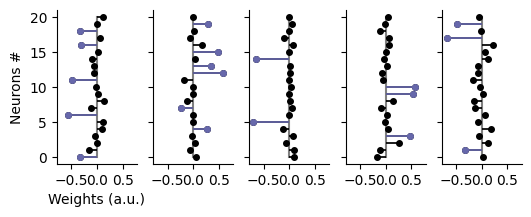

In [206]:
D['FL4_sess6'].get_weights(epoch= D['FL4_sess6'].epochs[1])
D['FL4_sess6'].plot()
plt.show()
pattern_novel1 = D['FL4_sess6'].patterns

All assemblies are CA2

----

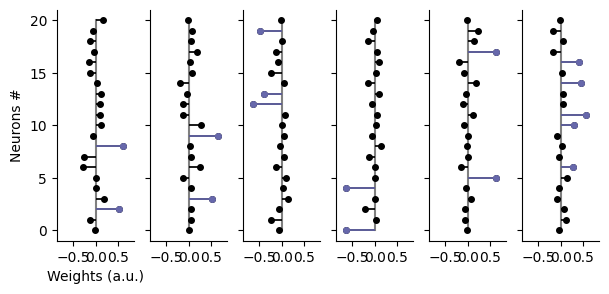

In [208]:
D['FL4_sess6'].get_weights(epoch= D['FL4_sess6'].epochs[3])
D['FL4_sess6'].plot()
plt.show()
pattern_novel2 = D['FL4_sess6'].patterns


All assemblies are CA2

----

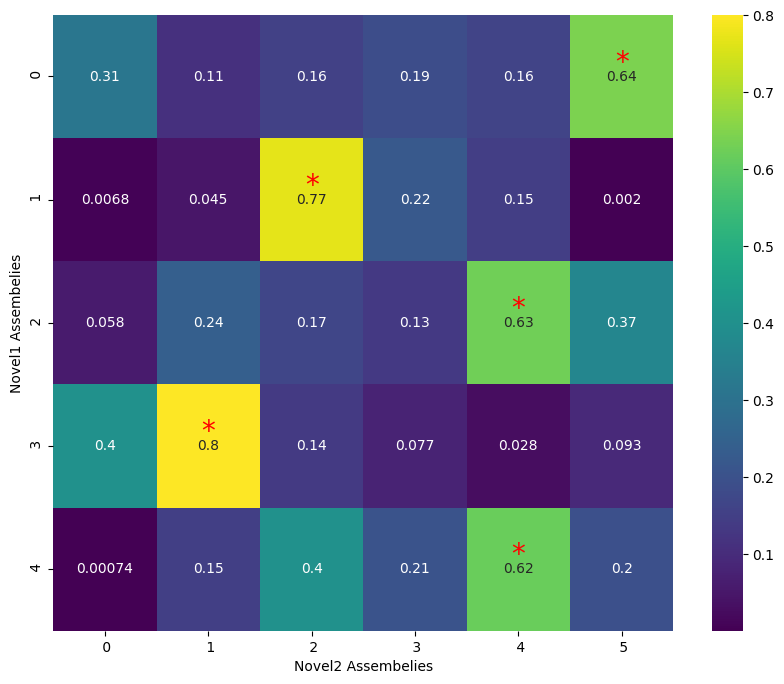

In [210]:

compare_patterns= np.concatenate((pattern_novel1, pattern_novel2))

SI,pairs ,pval =similarity_index(compare_patterns)

novel1_assembly_index = list(range(len(pattern_novel1)))
novel2_assembly_index = list(range(len(pattern_novel1),len(pattern_novel1)+len(pattern_novel2)))

heatmap_matrix_SI = np.zeros((len(novel1_assembly_index), len(novel2_assembly_index)))

significant_matrix = np.zeros_like(heatmap_matrix_SI, dtype=bool)

for i, a in enumerate(novel1_assembly_index):
    for j, b in enumerate(novel2_assembly_index):
        index = np.where((pairs[:, 0] == a) & (pairs[:, 1] == b))[0]
        if len(index) > 0:
            heatmap_matrix_SI[i, j] = SI[index[0]]
            significant_matrix[i, j] = pval[index[0]] < 0.05
        else:
            index = np.where((pairs[:, 0] == b) & (pairs[:, 1] == a))[0]
            if len(index) > 0:
                heatmap_matrix_SI[i, j] = SI[index[0]]
                significant_matrix[i, j] = pval[index[0]] < 0.05

plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_matrix_SI, annot=True, cmap='viridis', xticklabels=[f' {b}' for b in list(range(len(pattern_novel2)))], yticklabels=[f' {a}' for a in list(range(len(pattern_novel1)))])

for i in range(len(novel1_assembly_index)):
    for j in range(len(novel2_assembly_index)):
        if significant_matrix[i, j]:
            ax.text(j + 0.5, i + 0.5, '*',size = 20, color='red', ha='center', va='bottom')


plt.xlabel('Novel2 Assembelies')
plt.ylabel('Novel1 Assembelies')
plt.show()

### FL5

#### S6

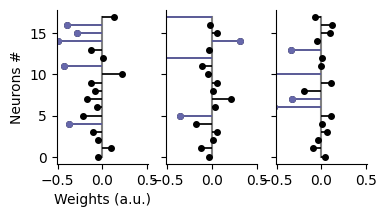

In [216]:
D['FL5_sess6'].get_weights(epoch= D['FL5_sess6'].epochs[1])
D['FL5_sess6'].plot()
plt.show()
pattern_novel1 = D['FL5_sess6'].patterns

All assemblies are CA2

----

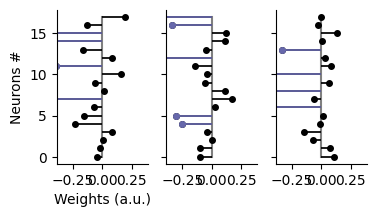

In [218]:
D['FL5_sess6'].get_weights(epoch= D['FL5_sess6'].epochs[3])
D['FL5_sess6'].plot()
plt.show()
pattern_novel2 = D['FL5_sess6'].patterns


All assemblies are CA2

----

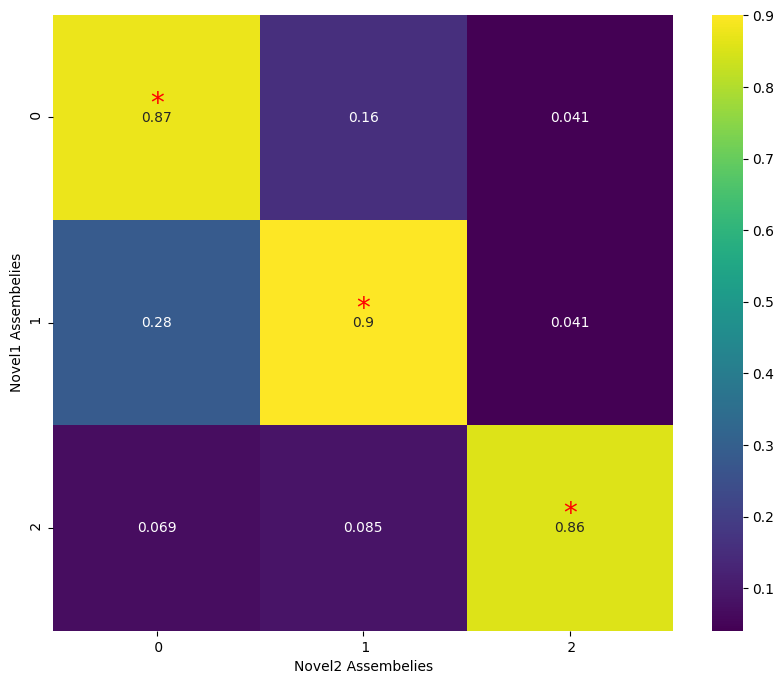

In [220]:

compare_patterns= np.concatenate((pattern_novel1, pattern_novel2))

SI,pairs ,pval =similarity_index(compare_patterns)

novel1_assembly_index = list(range(len(pattern_novel1)))
novel2_assembly_index = list(range(len(pattern_novel1),len(pattern_novel1)+len(pattern_novel2)))

heatmap_matrix_SI = np.zeros((len(novel1_assembly_index), len(novel2_assembly_index)))

significant_matrix = np.zeros_like(heatmap_matrix_SI, dtype=bool)

for i, a in enumerate(novel1_assembly_index):
    for j, b in enumerate(novel2_assembly_index):
        index = np.where((pairs[:, 0] == a) & (pairs[:, 1] == b))[0]
        if len(index) > 0:
            heatmap_matrix_SI[i, j] = SI[index[0]]
            significant_matrix[i, j] = pval[index[0]] < 0.05
        else:
            index = np.where((pairs[:, 0] == b) & (pairs[:, 1] == a))[0]
            if len(index) > 0:
                heatmap_matrix_SI[i, j] = SI[index[0]]
                significant_matrix[i, j] = pval[index[0]] < 0.05

plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_matrix_SI, annot=True, cmap='viridis', xticklabels=[f' {b}' for b in list(range(len(pattern_novel2)))], yticklabels=[f' {a}' for a in list(range(len(pattern_novel1)))])

for i in range(len(novel1_assembly_index)):
    for j in range(len(novel2_assembly_index)):
        if significant_matrix[i, j]:
            ax.text(j + 0.5, i + 0.5, '*',size = 20, color='red', ha='center', va='bottom')


plt.xlabel('Novel2 Assembelies')
plt.ylabel('Novel1 Assembelies')
plt.show()

## Familiar-Familiar

### FL4

#### S8

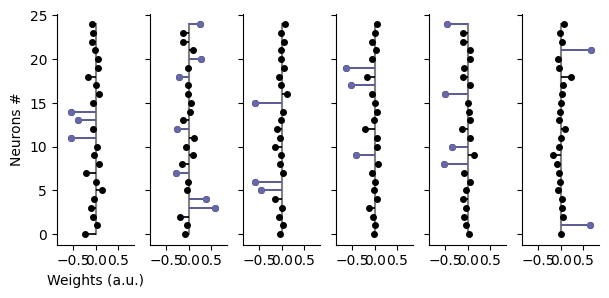

In [231]:
D['FL4_sess8'].get_weights(epoch= D['FL4_sess8'].epochs[1])
D['FL4_sess8'].plot()
plt.show()
pattern_familiar1 = D['FL4_sess8'].patterns

CA2 = 0,2,3


CA3 =

CA2-CA3 = 1,4,5

----

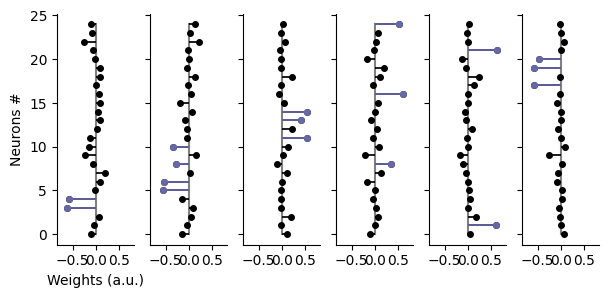

In [233]:
D['FL4_sess8'].get_weights(epoch= D['FL4_sess8'].epochs[3])
D['FL4_sess8'].plot()
plt.show()
pattern_familiar2 = D['FL4_sess8'].patterns


CA2 = 0,1,2,5

CA3 =

CA2-CA3 = 3,4

----

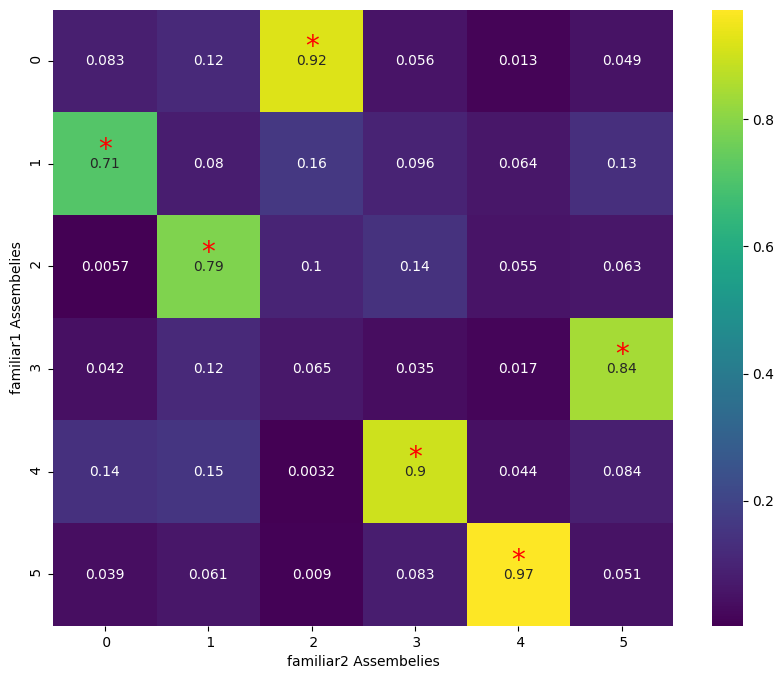

In [235]:

compare_patterns= np.concatenate((pattern_familiar1, pattern_familiar2))

SI,pairs ,pval =similarity_index(compare_patterns)

familiar1_assembly_index = list(range(len(pattern_familiar1)))
familiar2_assembly_index = list(range(len(pattern_familiar1),len(pattern_familiar1)+len(pattern_familiar2)))

heatmap_matrix_SI = np.zeros((len(familiar1_assembly_index), len(familiar2_assembly_index)))

significant_matrix = np.zeros_like(heatmap_matrix_SI, dtype=bool)

for i, a in enumerate(familiar1_assembly_index):
    for j, b in enumerate(familiar2_assembly_index):
        index = np.where((pairs[:, 0] == a) & (pairs[:, 1] == b))[0]
        if len(index) > 0:
            heatmap_matrix_SI[i, j] = SI[index[0]]
            significant_matrix[i, j] = pval[index[0]] < 0.05
        else:
            index = np.where((pairs[:, 0] == b) & (pairs[:, 1] == a))[0]
            if len(index) > 0:
                heatmap_matrix_SI[i, j] = SI[index[0]]
                significant_matrix[i, j] = pval[index[0]] < 0.05

plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_matrix_SI, annot=True, cmap='viridis', xticklabels=[f' {b}' for b in list(range(len(pattern_familiar2)))], yticklabels=[f' {a}' for a in list(range(len(pattern_familiar1)))])

for i in range(len(familiar1_assembly_index)):
    for j in range(len(familiar2_assembly_index)):
        if significant_matrix[i, j]:
            ax.text(j + 0.5, i + 0.5, '*',size = 20, color='red', ha='center', va='bottom')


plt.xlabel('familiar2 Assembelies')
plt.ylabel('familiar1 Assembelies')
plt.show()

### Fl5

#### S8

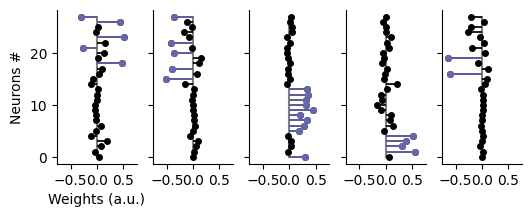

In [259]:
D['FL5_sess8'].get_weights(epoch= D['FL5_sess8'].epochs[1])
D['FL5_sess8'].plot()
plt.show()
pattern_familiar1 = D['FL5_sess8'].patterns

CA2 = 2, 3

CA3 = 0, 1, 4

CA2-CA3 = 

----

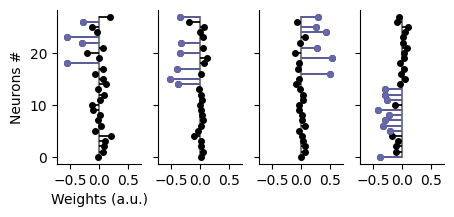

In [285]:
D['FL5_sess8'].get_weights(epoch= D['FL5_sess8'].epochs[3])
D['FL5_sess8'].plot()
plt.show()
pattern_familiar2 = D['FL5_sess8'].patterns


CA2 = 3

CA3 = 0, 1, 2

CA2-CA3 = 

----

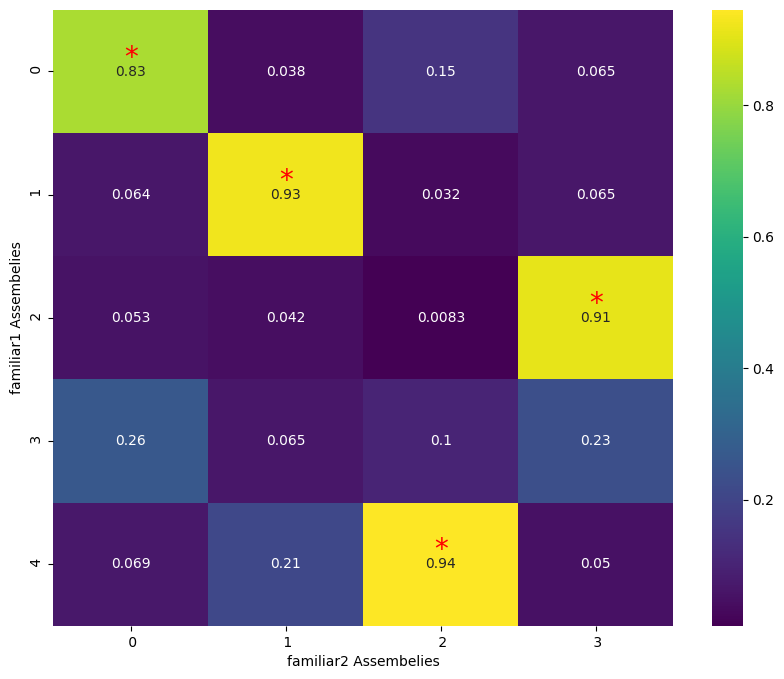

In [247]:

compare_patterns= np.concatenate((pattern_familiar1, pattern_familiar2))

SI,pairs ,pval =similarity_index(compare_patterns)

familiar1_assembly_index = list(range(len(pattern_familiar1)))
familiar2_assembly_index = list(range(len(pattern_familiar1),len(pattern_familiar1)+len(pattern_familiar2)))

heatmap_matrix_SI = np.zeros((len(familiar1_assembly_index), len(familiar2_assembly_index)))

significant_matrix = np.zeros_like(heatmap_matrix_SI, dtype=bool)

for i, a in enumerate(familiar1_assembly_index):
    for j, b in enumerate(familiar2_assembly_index):
        index = np.where((pairs[:, 0] == a) & (pairs[:, 1] == b))[0]
        if len(index) > 0:
            heatmap_matrix_SI[i, j] = SI[index[0]]
            significant_matrix[i, j] = pval[index[0]] < 0.05
        else:
            index = np.where((pairs[:, 0] == b) & (pairs[:, 1] == a))[0]
            if len(index) > 0:
                heatmap_matrix_SI[i, j] = SI[index[0]]
                significant_matrix[i, j] = pval[index[0]] < 0.05

plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_matrix_SI, annot=True, cmap='viridis', xticklabels=[f' {b}' for b in list(range(len(pattern_familiar2)))], yticklabels=[f' {a}' for a in list(range(len(pattern_familiar1)))])

for i in range(len(familiar1_assembly_index)):
    for j in range(len(familiar2_assembly_index)):
        if significant_matrix[i, j]:
            ax.text(j + 0.5, i + 0.5, '*',size = 20, color='red', ha='center', va='bottom')


plt.xlabel('familiar2 Assembelies')
plt.ylabel('familiar1 Assembelies')
plt.show()